### Plotting changes in temperature and precipitation (2091 - 2100 vs 1991 - 2000) on a map 

In [ ]:
# import packages
import numpy as np
import xarray as xr

# plotting
try:
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
except:
    print('plotting packages not installed!')

In [85]:
# define path to CMIP6 data
pathway = 'ssp585' # CHANGE HERE
model = 'gfdl-esm4' # CHANGE HERE 

datadir = '/home/steidani/hackathon/2021_ai_climate/data/cmip6/' + model + '/'

In [86]:
# open data

# future 2091 - 2100
t2m_future = xr.open_mfdataset(f'{datadir}' + model + '_r1i1p1f1_w5e5_' + pathway + '_tas_global_daily_2091_2100.nc', combine='by_coords').tas
precip_future = xr.open_mfdataset(f'{datadir}' + model + '_r1i1p1f1_w5e5_' + pathway + '_pr_global_daily_2091_2100.nc', combine='by_coords').pr

# hist 1991 - 2000
t2m_hist = xr.open_mfdataset(f'{datadir}' + model + '_r1i1p1f1_w5e5_historical_tas_global_daily_1991_2000.nc', combine='by_coords').tas
precip_hist = xr.open_mfdataset(f'{datadir}' + model + '_r1i1p1f1_w5e5_historical_pr_global_daily_1991_2000.nc', combine='by_coords').pr

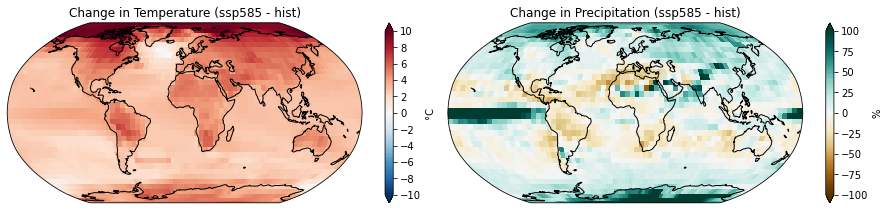

In [87]:
# plot change in temperature and precip

fig, axes = plt.subplots(1,2,figsize=(15,5), subplot_kw={'projection': ccrs.Robinson()})
fig.tight_layout(pad=9.0)

# left
axes[0].coastlines()
fig1 = (t2m_future.mean(dim='time') - t2m_hist.mean(dim='time')).plot(ax=axes[0],
        extend='both', levels = np.arange(-10,10.1,0.1), transform=ccrs.PlateCarree())
axes[0].set_title('Change in Temperature ('+pathway+' - hist)')
fig1_cbar = fig1.colorbar
fig1_cbar.set_ticks(np.arange(-10,11,2))
fig1_cbar.ax.set_ylabel('°C')

# right
axes[1].coastlines()
fig1 = ((precip_future.mean(dim='time') - precip_hist.mean(dim='time'))/precip_hist.mean(dim='time')*100).plot(ax=axes[1], 
       cmap='BrBG', levels = np.linspace(-100,100,100), extend='both', transform=ccrs.PlateCarree())
axes[1].set_title('Change in Precipitation ('+pathway+' - hist)')
fig1_cbar = fig1.colorbar
fig1_cbar.set_ticks(np.arange(-100,101,25))
fig1_cbar.ax.set_ylabel('%')


plt.savefig('change_' + pathway + '_' + model + '.png')